# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Import packages

In [99]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier, plot_importance

pd.set_option('display.max_columns', None)



### Load dataset



In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df.shape

(14999, 10)

In [4]:
df.size

149990

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [7]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### Gather descriptive statistics about the data

In [9]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

In [10]:
# Display all column names
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
# Rename columns as needed
### YOUR CODE HERE ###
new_cols = ['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'company_tenure', 'work_accidents', 'left_job',
       'promotion_last_5years', 'department', 'salary_level']

# Display all column names after the update
### YOUR CODE HERE ###
df.columns = new_cols
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'company_tenure', 'work_accidents', 'left_job',
       'promotion_last_5years', 'department', 'salary_level'],
      dtype='object')

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,company_tenure,work_accidents,left_job,promotion_last_5years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [13]:
# Check for missing values
### YOUR CODE HERE ###
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
company_tenure           0
work_accidents           0
left_job                 0
promotion_last_5years    0
department               0
salary_level             0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [14]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated().sum()

3008

In [15]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,company_tenure,work_accidents,left_job,promotion_last_5years,department,salary_level
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [16]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,company_tenure,work_accidents,left_job,promotion_last_5years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

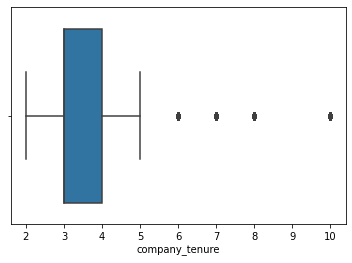

In [17]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(df1['company_tenure']);

In [18]:
df1.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,company_tenure,work_accidents,left_job,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [19]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

quantile_75 = df1['company_tenure'].quantile(.75)

df1[df1['company_tenure'] > quantile_75]

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,company_tenure,work_accidents,left_job,promotion_last_5years,department,salary_level
1,0.80,0.86,5,262,6,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
12,0.84,0.92,4,234,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. Decision was made to use tree based models, so I'll keep outliers in.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [20]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print("Total People Who Left vs Stayed: ")
print(df1['left_job'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print("Percentage of People Who Left vs Stayed: ")
print(df1['left_job'].value_counts(normalize=True))

Total People Who Left vs Stayed: 
0    10000
1     1991
Name: left_job, dtype: int64
Percentage of People Who Left vs Stayed: 
0    0.833959
1    0.166041
Name: left_job, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [21]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'company_tenure', 'work_accidents', 'left_job',
       'promotion_last_5years', 'department', 'salary_level'],
      dtype='object')

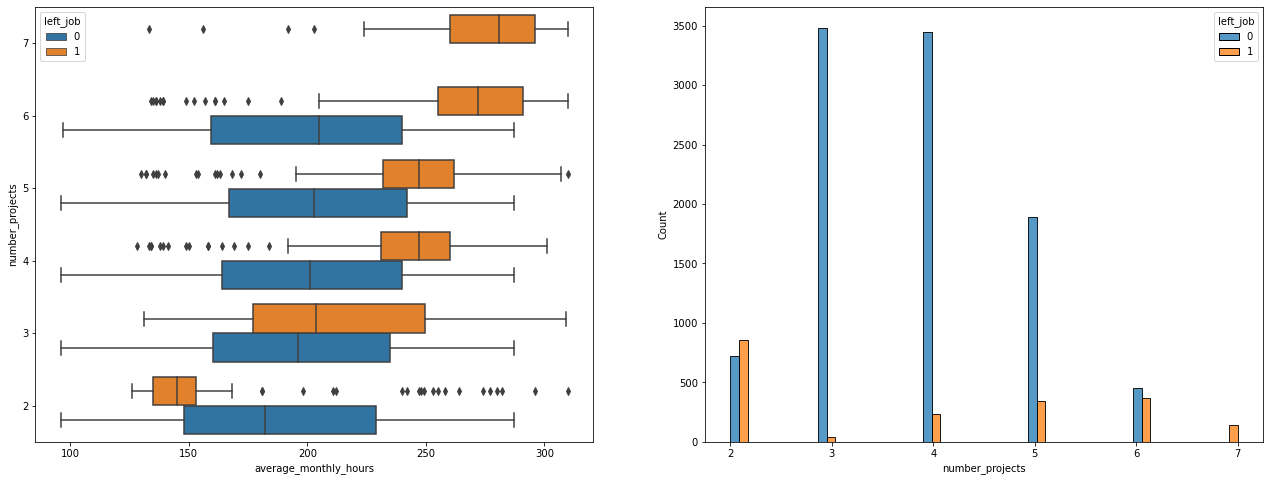

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2,figsize = (22,8))
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_projects', hue = 'left_job',
           orient='h', ax=ax[0])
ax[0].invert_yaxis()

sns.histplot(data = df1, x = 'number_projects', hue = 'left_job', multiple = 'dodge');

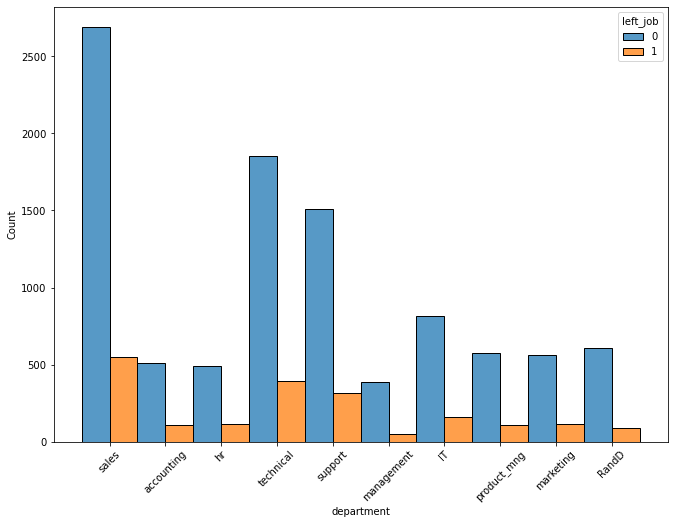

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize = (11,8))
sns.histplot(data = df1, x = 'department', hue = 'left_job', multiple='dodge')
plt.xticks(rotation = 45);

In [24]:
df1.groupby('department').sum()['left_job']

department
IT             158
RandD           85
accounting     109
hr             113
management      52
marketing      112
product_mng    110
sales          550
support        312
technical      390
Name: left_job, dtype: int64

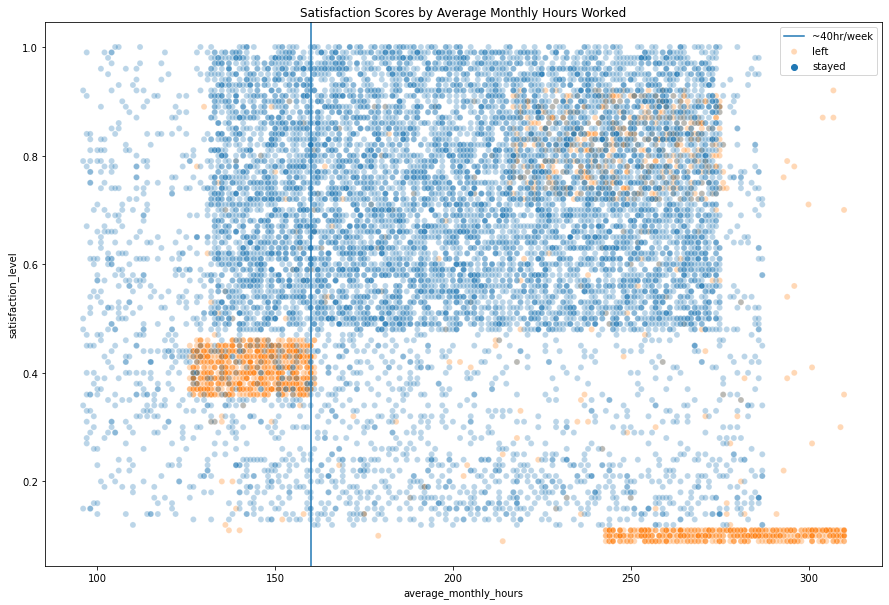

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (15,10))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left_job', alpha=0.3)
plt.axvline(160, label = '~40hr/week')
plt.legend(['~40hr/week', 'left', 'stayed'])
plt.title("Satisfaction Scores by Average Monthly Hours Worked");

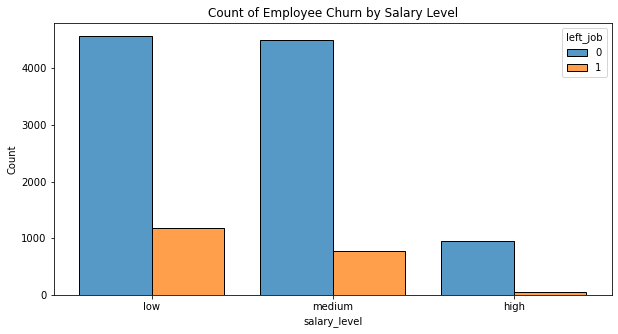

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (10,5))
sns.histplot(data = df1, x = 'salary_level', hue = 'left_job', multiple='dodge', shrink=0.8)
plt.title("Count of Employee Churn by Salary Level");

In [27]:
df1.groupby('salary_level').sum()['left_job']

salary_level
high        48
low       1174
medium     769
Name: left_job, dtype: int64

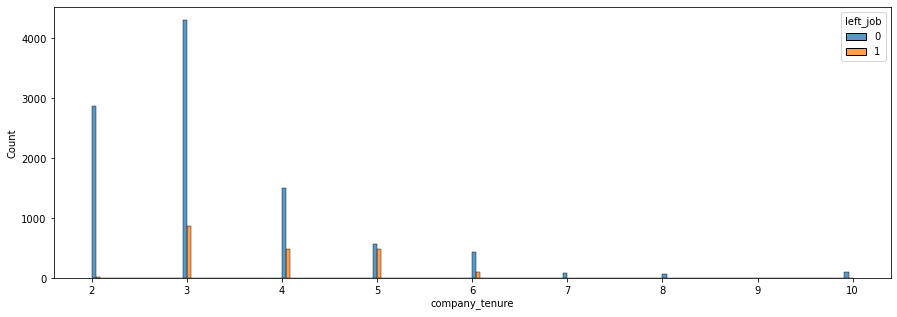

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (15,5))
sns.histplot(data = df1, x = 'company_tenure', hue = 'left_job', multiple = 'dodge')

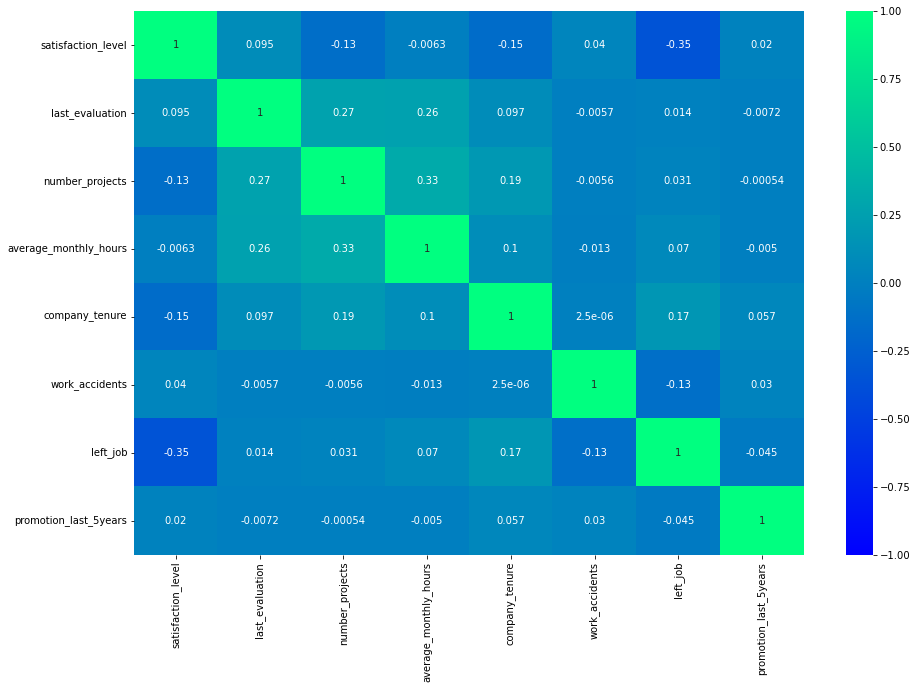

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')

### Insights

Looking at some of the variables it looks like management, or lack thereof, is causing a lot of the unhappiness within the company. If you look at the scatter plot of average monthly hours worked against satisfaction you can see that as hours greatly increase (250 to 300 hours monthly) satisfaction scores are dropping near zero and a large amount of those employees are leaving the company. Also as employees take on more projects a higher percentage of them end up leaving the company. It's rare that someone with a high salary level will leave the company but there wasn't a huge difference between the low and medium salary churn rates. 

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task is to determine whether or not an employee will leave the company or not. This is a binary decision, either they will leave or they won't.

### Identify the types of models most appropriate for this task.

Since this is a binary classification decision you could use logistic regression or a tree type model. With logistic regression we'd need to scale a lot of the data with the average hours being on a higher scale than the rest of the data. Logistic regression is also sensitive to outliers and we've already discovered that there are several outliers in the tenure column so we'd have to handle those values and remove more of the data if we wanted to go with a logistic regression model. I'll need to encode the categorical data regardless so that doesn't play into the decision too much. I think a tree model will work best with the different scales of data, the outliers in the dataset, and in particular it will allow me to get the feature importance and see which of the predictor variables play the biggest role in why an employee leaves or stays. 

## Modeling



### Feature Transformation

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_projects        11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   company_tenure         11991 non-null  int64  
 5   work_accidents         11991 non-null  int64  
 6   left_job               11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary_level           11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [31]:
df1.salary_level.unique()

array(['low', 'medium', 'high'], dtype=object)

In [32]:
# creating an order for salary is an ordinal category , high is greater than medium which is greater than low

salary_dict = {'low': 0, 'medium': 1, 'high': 2}

df1['salary_level'] = df1['salary_level'].map(salary_dict)

In [33]:
df1.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,company_tenure,work_accidents,left_job,promotion_last_5years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [34]:
# encode the department column
df1 = pd.get_dummies(df1, drop_first=True)

In [35]:
df1.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,company_tenure,work_accidents,left_job,promotion_last_5years,salary_level,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


### Decision Tree Model First Attempt

In [36]:
# start with decision tree and decision tree Grid Search
dtc = DecisionTreeClassifier(random_state=42)

In [37]:
# scoring parameters

scoring = ['recall', 'accuracy', 'f1', 'precision', 'roc_auc']

In [38]:
# parameter dictionary
dt_params = {
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt']
    
}

In [39]:
# split training, testing set
y = df1['left_job']

X = df1.copy()
X = X.drop('left_job', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, stratify = y, random_state = 0 )

In [40]:
dt_grid = GridSearchCV(dtc, param_grid=dt_params, scoring=scoring, cv = 5, refit = 'roc_auc')

In [41]:
model = dt_grid.fit(X_train, y_train)

In [42]:
model.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}

In [43]:
model.best_score_

0.9584672629869887

In [44]:
def results_table(model_name:str, model, metric_choice:str):
    
    
    # map input for metric_choice
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    
    # create dataframe of gridsearch results
    grid_results = pd.DataFrame(model.cv_results_)
    
    # find best model results based on metric_choice
    best_results = grid_results.iloc[grid_results[metric_dict[metric_choice]].idxmax(), :]
    
    # obtain results from best model
    auc = best_results.mean_test_roc_auc
    precision = best_results.mean_test_precision
    recall = best_results.mean_test_recall
    f1 = best_results.mean_test_f1
    accuracy = best_results.mean_test_accuracy
    
    # create new table
    table = pd.DataFrame()
    table_dict = {
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'f1': [f1],
        'accuracy': [accuracy],
        'auc': [auc]
    }
    table = pd.DataFrame(table_dict)
    
    
    return table
    
    

In [86]:
dt_results = results_table('decision_tree', model, 'auc')
dt_results

,model,precision,recall,f1,accuracy,auc
0,decision_tree,0.932155,0.896842,0.913792,0.971868,0.958467


### Random Forest Model Attempt One

In [46]:
rf = RandomForestClassifier(random_state= 5)

In [53]:
# random forest grid search parameters
rf_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1,3,5],
    'max_features': ['sqrt'],
    'n_estimators': [100, 500]
}

In [54]:
rf_grid = GridSearchCV(rf, param_grid=rf_params, scoring=scoring, cv = 5, refit = 'roc_auc')

In [55]:
rf_model = rf_grid.fit(X_train, y_train)

In [57]:
rf_model.best_score_

0.9796411438576016

In [58]:
rf_model.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [59]:
rf_results = results_table('random_forest', rf_model, 'auc')
rf_results

,model,precision,recall,f1,accuracy,auc
0,random_forest,0.981546,0.890811,0.933951,0.979094,0.979641


In [60]:
print(rf_results)
print(result_table1)

           model  precision    recall        f1  accuracy       auc
0  random_forest   0.981546  0.890811  0.933951  0.979094  0.979641
           model  precision    recall        f1  accuracy       auc
0  decision_tree   0.932155  0.896842  0.913792  0.971868  0.958467


## Feature Engineering

**Instead of scaling the average monthly hours column, I'm going to create a new column that indicates if, on average, a person works more than nine (9) hours a day, for five days a week, for 50 weeks a year. That comes out to 187.5 hours per month. I'm also going to drop the satisfaction level column. Intrinsically, if an employee has a low satisfaction level they are more likely to leave the company. Being overworked, having too many projects, not getting feedback, etc can all play a factor in satisfaction levels. To avoid the dependence of the other variables on satisfaction level, when we're trying to determine what really causes an employee to leave, I'll remove the satisfaction level columns from this round.** 

In [61]:
df1['overworked'] = (df1['average_monthly_hours'] > 187.5).astype(int)

In [63]:
df1.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,company_tenure,work_accidents,left_job,promotion_last_5years,salary_level,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [126]:
# drop average monthly hours and satisfactin level cols
df2 = df1.drop(['average_monthly_hours', 'satisfaction_level'], axis = 1)

In [128]:
df2.head()

,last_evaluation,number_projects,company_tenure,work_accidents,left_job,promotion_last_5years,salary_level,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [129]:
# new training/testing sets
y = df2['left_job']

X = df2.copy()
X = df2.drop('left_job', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 5)

### Decision Tree Attempt Two

In [130]:
tree = DecisionTreeClassifier(random_state=10)

In [131]:
# parameter dictionary
dt_params = {
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt']
    
}

In [132]:
# will use the same paramters/scoring for the grid search
tree_grid = GridSearchCV(tree, param_grid=dt_params, scoring=scoring, cv=5, refit='roc_auc')

In [133]:
%%time
tree_model = tree_grid.fit(X_train, y_train)

CPU times: user 563 ms, sys: 18 µs, total: 563 ms
Wall time: 562 ms


In [134]:
tree_model.best_score_

0.9464650049007505

In [135]:
tree_model.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}

In [136]:
tree_results = results_table('decision_tree2', tree_model, 'auc')
tree_results

,model,precision,recall,f1,accuracy,auc
0,decision_tree2,0.868335,0.854672,0.861146,0.954187,0.946465


### Random Forest Attempt Two

In [137]:
rf2 = RandomForestClassifier(random_state=12)

In [138]:
# random forest grid search parameters
rf_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1,3,5],
    'max_features': ['sqrt'],
    'n_estimators': [100, 500]
}

In [139]:
# same parameters/scoring for grid search
rf2_grid = GridSearchCV(rf2, param_grid=rf_params, scoring=scoring, cv = 5, refit = 'roc_auc')

In [140]:
%%time
rf2_model = rf2_grid.fit(X_train, y_train)

CPU times: user 3min 47s, sys: 680 ms, total: 3min 47s
Wall time: 3min 47s


In [141]:
rf2_model.best_score_

0.9705919852154461

In [142]:
rf2_model.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [143]:
rf2_results = results_table('random_forest2', rf2_model, 'auc')
rf2_results

,model,precision,recall,f1,accuracy,auc
0,random_forest2,0.928122,0.794348,0.855979,0.955631,0.970592


In [144]:
final_scores = pd.concat([dt_results, tree_results, rf_results, rf2_results]).reset_index(drop=True)
final_scores

,model,precision,recall,f1,accuracy,auc
0,decision_tree,0.932155,0.896842,0.913792,0.971868,0.958467
1,decision_tree2,0.868335,0.854672,0.861146,0.954187,0.946465
2,random_forest,0.981546,0.890811,0.933951,0.979094,0.979641
3,random_forest2,0.928122,0.794348,0.855979,0.955631,0.970592


## Evaluate Best Models

In [145]:
# helper function for confusion matrix displays

def display_confusion_matrix(model, y_data, y_preds):
    
    """
    Helper function to create a confusion matrix based on the models predictions.
    
    model - fitted model
    y_data - actual y data - generally the y_test
    y_preds - predicted y data from fitted model
    
    returns a confusion matrix display 
    
    """
    
    cm = confusion_matrix(y_data, y_preds, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot(values_format = '')

### Decision Tree Evaluation

**Based off the above scores I'll use the second decision tree for final evaluation.**

In [146]:
# get predictions for confusion matrix
tree_preds = tree_model.best_estimator_.predict(X_test)

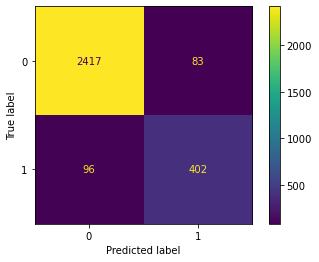

In [147]:
# create confusion matrix
display_confusion_matrix(tree_model, y_test, tree_preds)

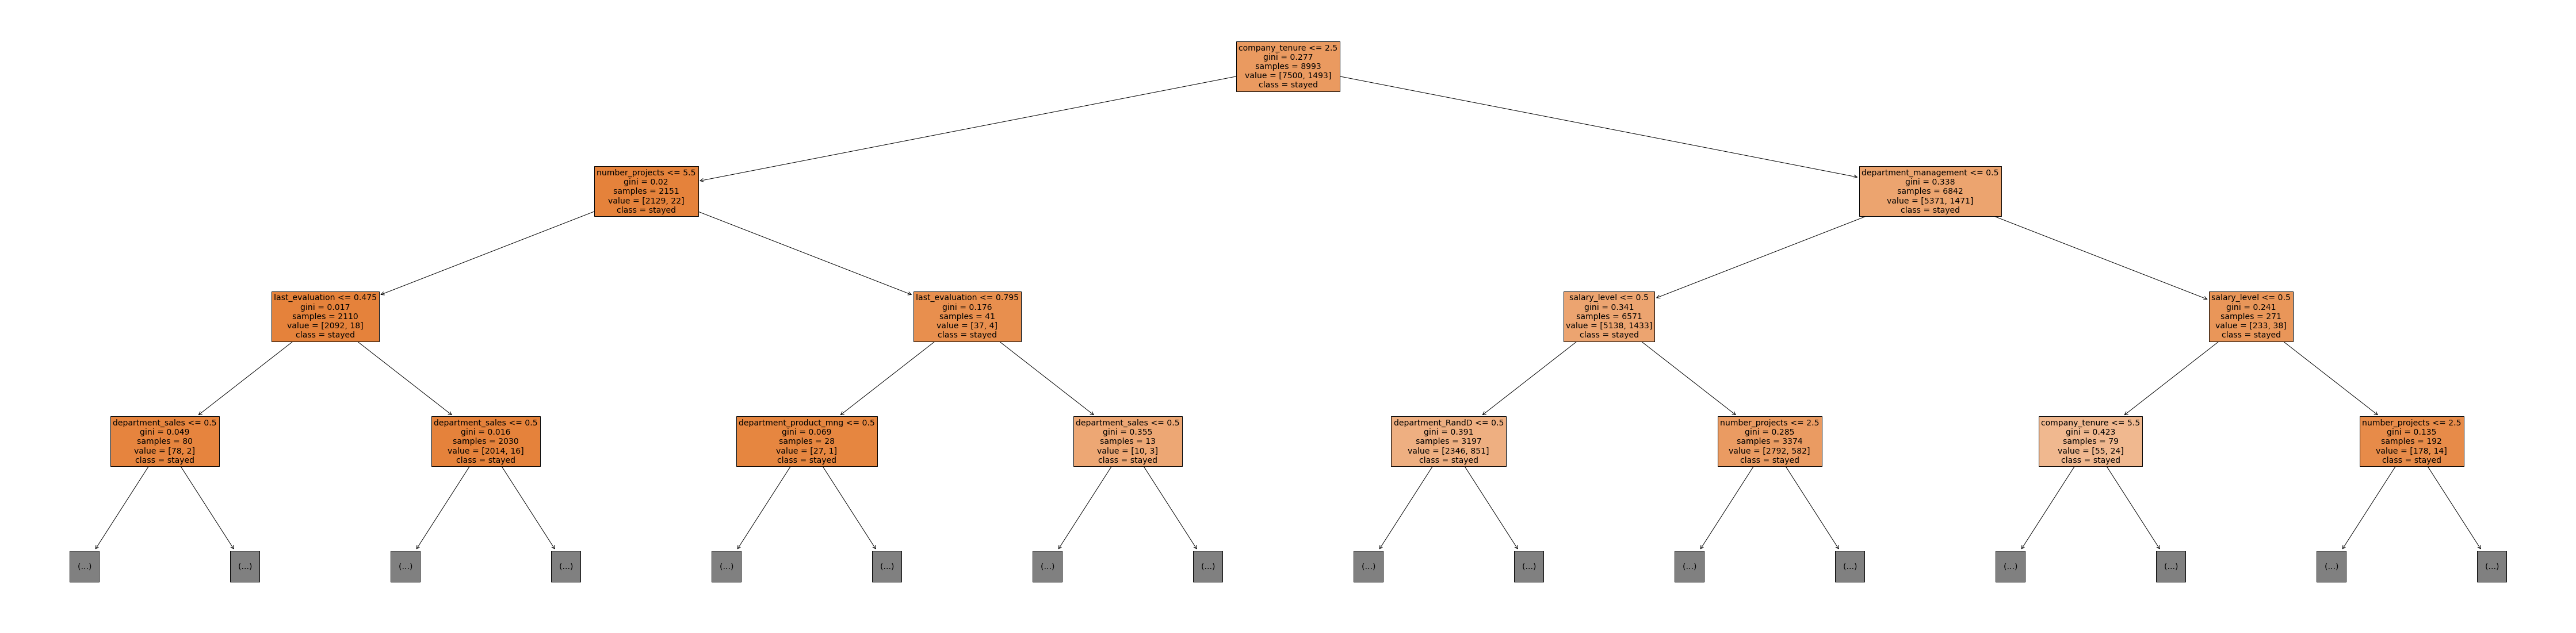

In [148]:
# plot the actual decision tree
plt.figure(figsize = (80,20))
plot_tree(tree_model.best_estimator_, max_depth = 3, fontsize = 14, feature_names=X.columns,
         class_names={0:'stayed', 1:'left'}, filled=True)
plt.show();

In [149]:
# show feature importance
tree_model_features = pd.DataFrame(tree_model.best_estimator_.feature_importances_,
                                   columns = ['gini_coefficient'],
                                   index = X.columns).sort_values(by='gini_coefficient', ascending = False)
tree_model_features[tree_model_features['gini_coefficient'] > 0]

,gini_coefficient
last_evaluation,0.337457
number_projects,0.294231
company_tenure,0.280866
overworked,0.035310
salary_level,0.021405
work_accidents,0.009164
department_sales,0.006406
department_technical,0.004575
department_RandD,0.003812
department_support,0.001777


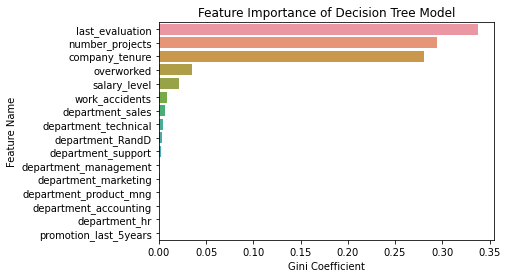

In [150]:
sns.barplot(data=tree_model_features, x = 'gini_coefficient', y = tree_model_features.index, orient = 'h')
plt.title("Feature Importance of Decision Tree Model")
plt.xlabel("Gini Coefficient")
plt.ylabel("Feature Name")
plt.show();

### Random Forest Model Evaluation

**As for the decision tree I will use the second random forest model.**

In [151]:
# get predictions
rf_preds= rf2_model.best_estimator_.predict(X_test)

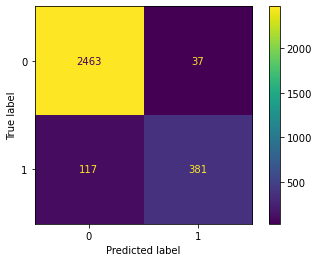

In [152]:
# confusion matrix
display_confusion_matrix(rf2_model, y_test, rf_preds)

In [156]:
# random forest features
rf2_features = rf2_model.best_estimator_.feature_importances_

# indices of top 10 features
feat_ind = np.argpartition(rf2_model.best_estimator_.feature_importances_, -10)[-10:]

# labels
feat_labels = X.columns[feat_ind]

# get top 10 features
rf2_features = rf2_features[feat_ind]

# create dataframe for feature importance
feat_df = pd.DataFrame({"Feature": feat_labels, "Importance": rf2_features}).sort_values("Importance", ascending = False)

In [157]:
feat_df

,Feature,Importance
7,number_projects,0.408982
8,company_tenure,0.233883
9,last_evaluation,0.203775
6,overworked,0.107361
5,work_accidents,0.018418
4,salary_level,0.016670
1,promotion_last_5years,0.002203
2,department_RandD,0.001571
3,department_support,0.001222
0,department_management,0.001133


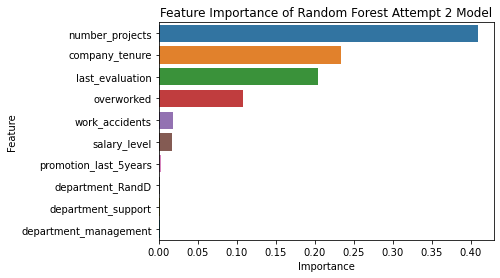

In [158]:
# plot the features

sns.barplot(data = feat_df, x = 'Importance', y = 'Feature', orient = 'h')
plt.title("Feature Importance of Random Forest Attempt 2 Model")
plt.show()